<font size="520"><center>The Android App Market</center></font>


<b>1) Data:</b> The data for this project was already scraped from the Google Play website<br><br>
<b>2) Overview and motivation:</b> We were interested in discovering the Android App Market and comparing over 10,000 apps in Google Play across different categories.<br><br>
<b>3) Related Work:</b> We used the techniques discussed in the notebooks and explained in the lectures.<br><br>
<b>4) initial Questions:</b> How to visualize and explore a given dataset to extract meaningful information.<br><br>
<b>5) Exploratory Data Analysis:</b> We mainly used Bar Charts because we wanted to compare between chosen attributes (First, we used scatter plots but no meaningful visualization was retrieved )<br><br>
<b>6) Final Analysis:</b> <li>First graph shows that, The most installed apps were from the game and communication category
</li><li>Second graph shows that, Most reviews were written by Teenagers away from everyone</li>
<li>Third graph shows that, Considering all categories most of the apps were free</li> <li>Fourth graph shows that, The most reviewed category was the game </li> <li>Fifth graph shows that, The Family category has the most apps</li><br>
<b>7) Presentation:</b> <li>The strength of our results: our visualizations answered all our questions</li> <li>The weaknesses of our results: The number of installations is not accurate as it is approximated after removing "+" in order to convert it from string type to float type, more visualizations could be retrieved if more time was given</li>

Please run the cells in order, to avoid the error that would arise when converting to a float twice..etc 


# Data Cleaning: Missing Values Imputation

In [1]:
import pandas as pd
import numpy as np

# read in all our data
data = pd.read_csv("googleplaystore.csv")

# set seed for reproducibility
np.random.seed(0)

Check how many missing values we have

In [2]:
missing_values_count = data.isnull().sum()

# look at the # of missing points in the first ten columns
print(missing_values_count)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


Impute the missing values in the rating column with the mean

In [3]:
new_data = data.copy()
rating = data["Rating"]
rating = rating.fillna(rating.mean())
new_data["Rating"] = rating

# look at the # of missing points in the first ten columns
print(new_data.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64


Remove the record which has a missing value in the Type attribute because we only had 1 record where the Type value is missing

In [4]:
new_data = new_data[new_data.Type.notnull()]
print(new_data.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64


Remove the record which has a missing value in the Content Rating attribute because we only had 1 record where the Content Rating value is missing

In [5]:
new_data = new_data[new_data["Content Rating"].notnull()]
print(new_data.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64


Assume that the apps with a missing current version have the version 1.0.0

In [6]:
# assume missing versions are 1.0.0
version = new_data["Current Ver"]
version = version.fillna("1.0.0")
new_data["Current Ver"] = version
print(new_data.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       2
dtype: int64


assume missing android version: varies with device

In [7]:
android_version = new_data["Android Ver"]
android_version = android_version.fillna("Varies with device")
new_data["Android Ver"] = android_version
print(new_data.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


Make sure we don't have any missing values

In [8]:
new_data.isnull().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

In [9]:
new_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Visualization & Exploration

In [10]:
copy = new_data.copy()
copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Installs & Category (Summation of installs in each category)

In [11]:
#convert the data type of installs from string to float by replacing (+) and removing (,)
copy.Installs = copy.Installs.str.replace('+','')
copy.Installs = copy.Installs.str.replace(',', '')
copy.Installs = copy.Installs.astype(str).astype(float)

Grouped_cat_inst = copy.groupby(['Category']).sum()['Installs']

Grouped_cat_inst

Category
ART_AND_DESIGN         1.243381e+08
AUTO_AND_VEHICLES      5.313021e+07
BEAUTY                 2.719705e+07
BOOKS_AND_REFERENCE    1.921470e+09
BUSINESS               1.001915e+09
COMICS                 5.608615e+07
COMMUNICATION          3.264728e+10
DATING                 2.643108e+08
EDUCATION              8.714520e+08
ENTERTAINMENT          2.869160e+09
EVENTS                 1.597316e+07
FAMILY                 1.025826e+10
FINANCE                8.766487e+08
FOOD_AND_DRINK         2.738988e+08
GAME                   3.508602e+10
HEALTH_AND_FITNESS     1.583073e+09
HOUSE_AND_HOME         1.687125e+08
LIBRARIES_AND_DEMO     6.299591e+07
LIFESTYLE              5.376435e+08
MAPS_AND_NAVIGATION    7.242819e+08
MEDICAL                5.325744e+07
NEWS_AND_MAGAZINES     7.496318e+09
PARENTING              3.152111e+07
PERSONALIZATION        2.325495e+09
PHOTOGRAPHY            1.008825e+10
PRODUCTIVITY           1.417609e+10
SHOPPING               3.247849e+09
SOCIAL             

In [12]:
#representing the category names using abbreviations by the first 2 characters 
unique_categories = Grouped_cat_inst.index    
unique_cat_abbreviations = []
for col in unique_categories:
    unique_cat_abbreviations.append(col[0:4])
unique_cat_abbreviations        

['ART_',
 'AUTO',
 'BEAU',
 'BOOK',
 'BUSI',
 'COMI',
 'COMM',
 'DATI',
 'EDUC',
 'ENTE',
 'EVEN',
 'FAMI',
 'FINA',
 'FOOD',
 'GAME',
 'HEAL',
 'HOUS',
 'LIBR',
 'LIFE',
 'MAPS',
 'MEDI',
 'NEWS',
 'PARE',
 'PERS',
 'PHOT',
 'PROD',
 'SHOP',
 'SOCI',
 'SPOR',
 'TOOL',
 'TRAV',
 'VIDE',
 'WEAT']

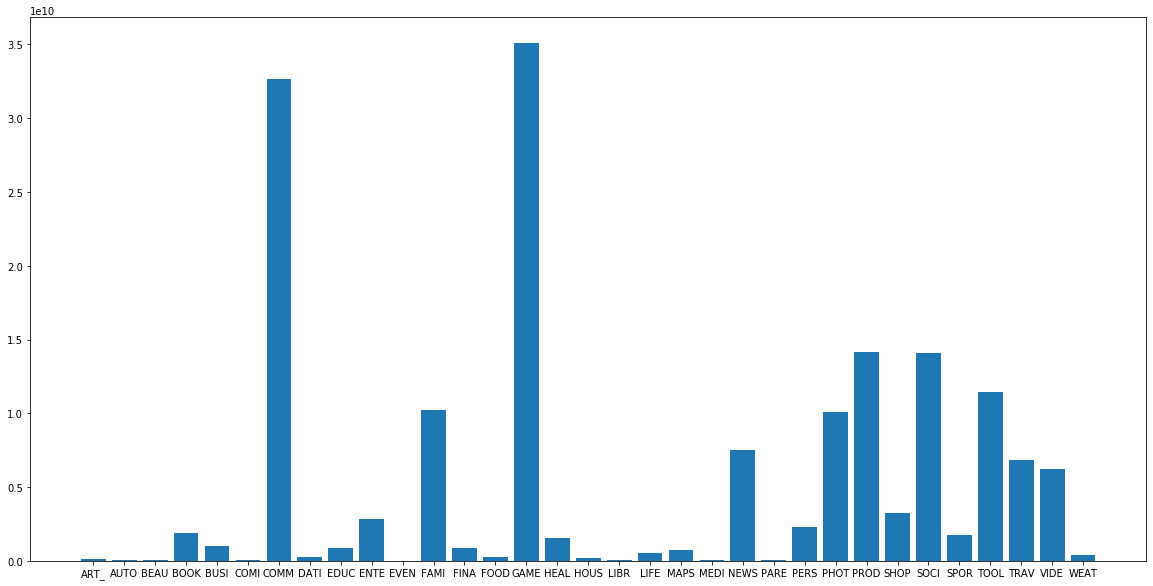

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.bar(unique_cat_abbreviations, Grouped_cat_inst.values)
plt.show()

Content Rating & Reviews (Most reviews were written by who?)

C:\Users\Sarah\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


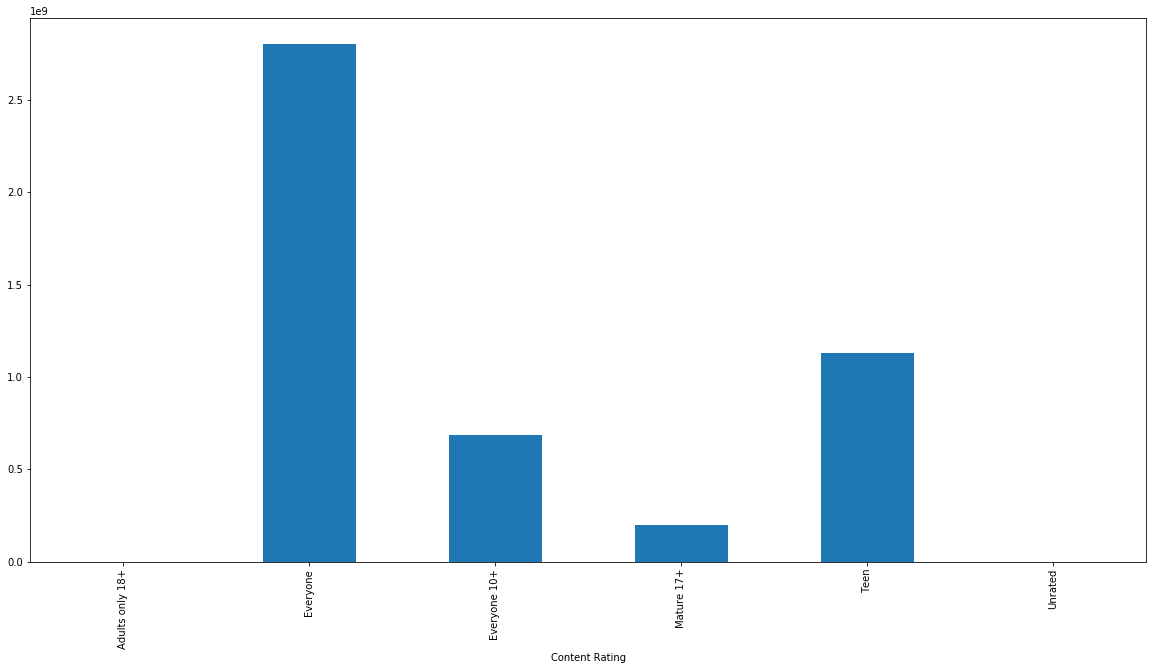

In [15]:
copy1 = copy[['Content Rating', 'Reviews']]
#converting reviews data type from string to int
copy1.Reviews=copy1.Reviews.astype(str).astype(int)
copy1.groupby('Content Rating').Reviews.sum().plot(kind='bar',figsize=(20,10))
# plt.show()

Category & Type (How many free and paid apps are there in each category)

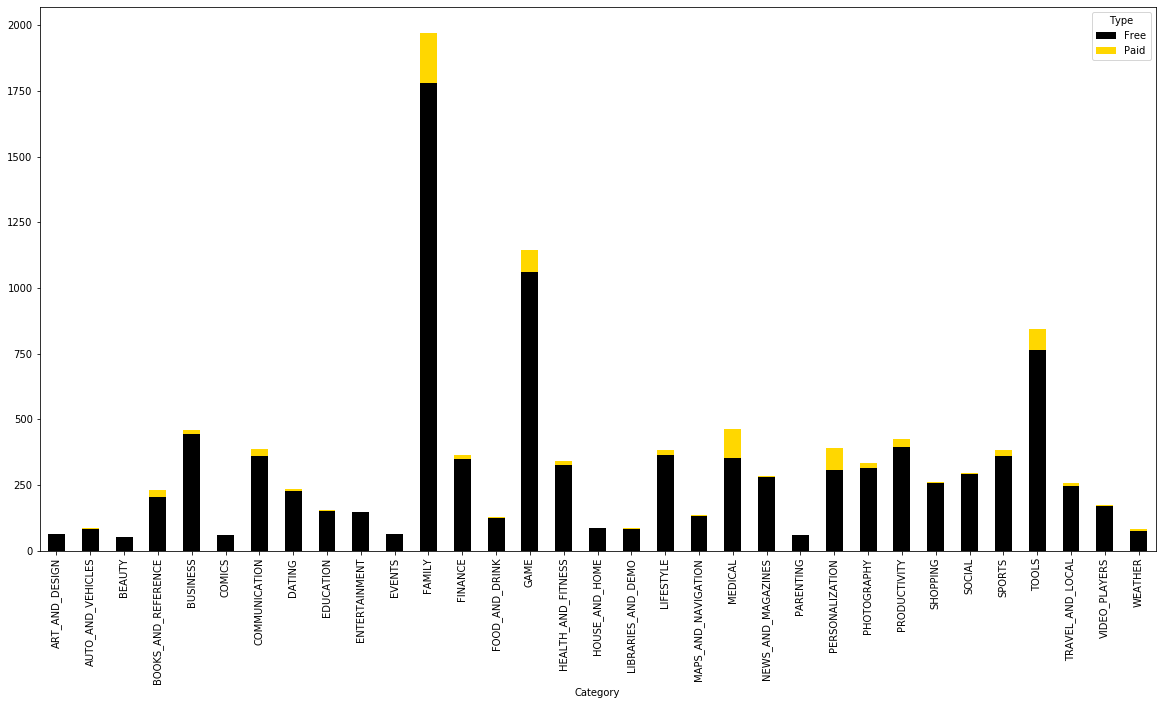

In [16]:
import pandas as pd

price = pd.crosstab([new_data.Category], new_data.Type.astype(str))
price.plot(kind='bar', stacked=True, color=['black','gold'], grid=False ,figsize=(20,10))

Category & Reviews (Which category has more reviews?)

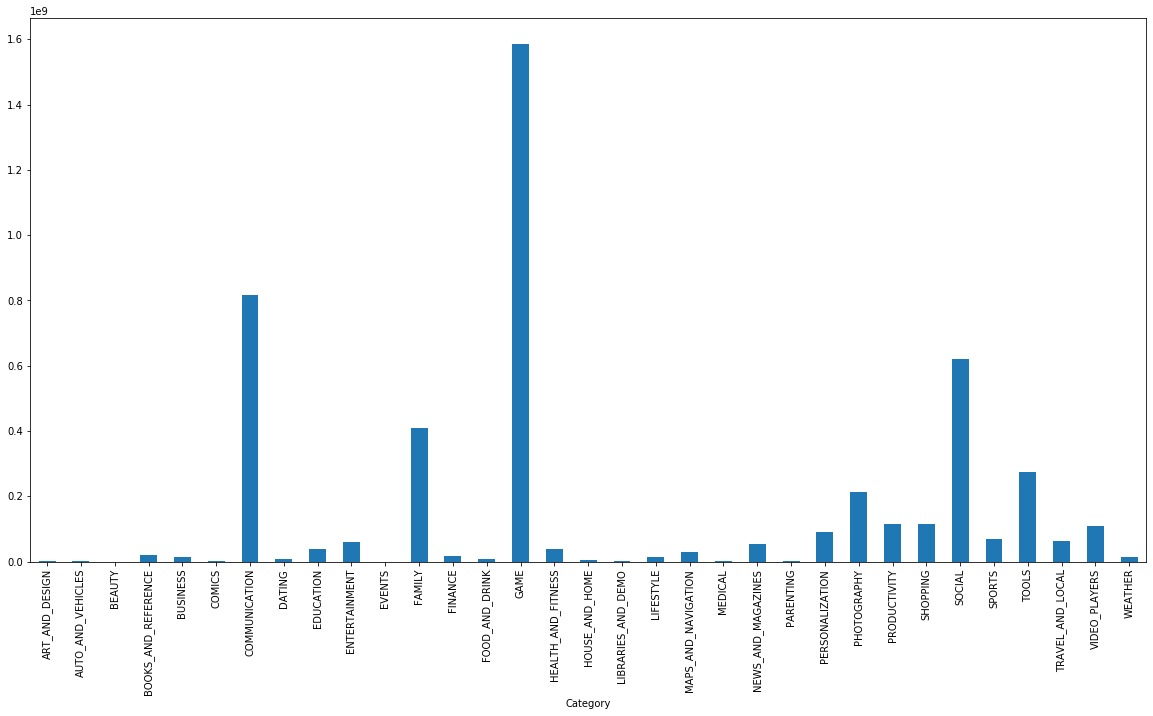

In [17]:
copy2 = new_data[['Category', 'Reviews']]
#converting reviews data type from string to int
copy2.Reviews=copy2.Reviews.astype(str).astype(int)
copy2.groupby('Category').Reviews.sum().plot(kind='bar', figsize=(20,10))

Category & Apps(How many apps in each category)

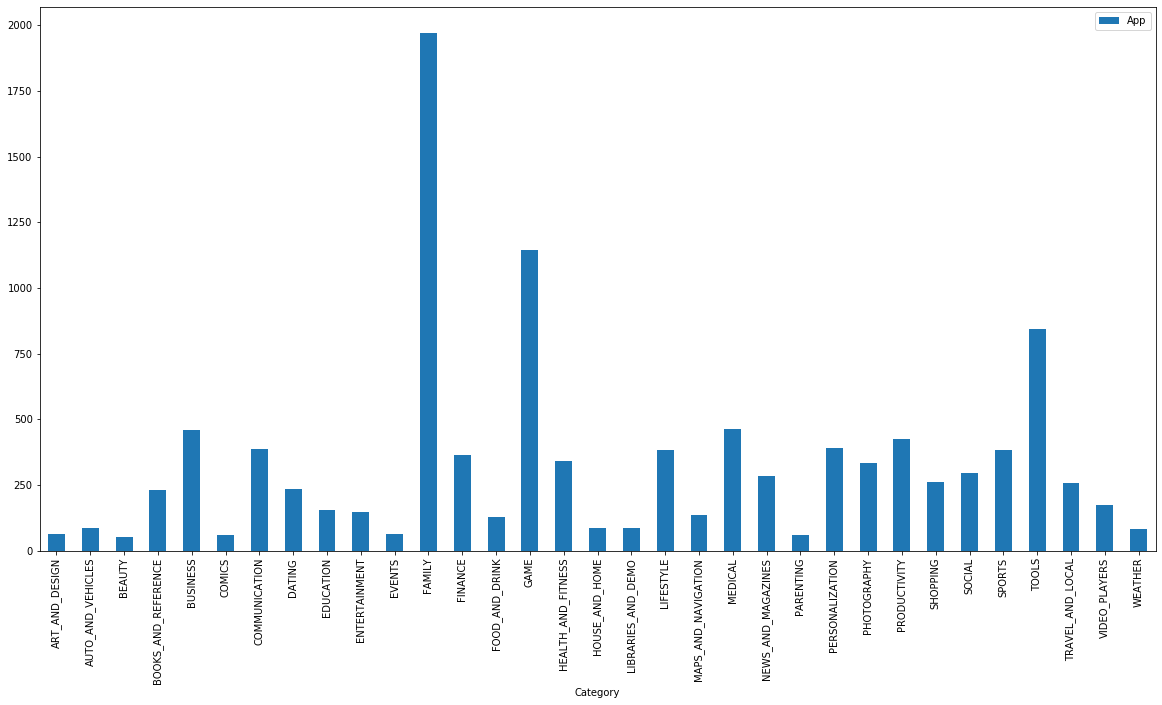

In [18]:
copy2 = new_data[['Category', 'App']]
copy2.groupby('Category').count().plot(kind='bar', figsize=(20,10))
